# Large Dataset Experiments

In [11]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.algorithm import run_genetic_algorithm
from src.genetic_operators import ( tournament_selection, roulette_wheel_selection
                                , one_point_crossover, uniform_crossover
                                , single_gene_mutation, independent_gene_mutation)

Large Graph Loaded
Nodes: 450
Edges: 8169


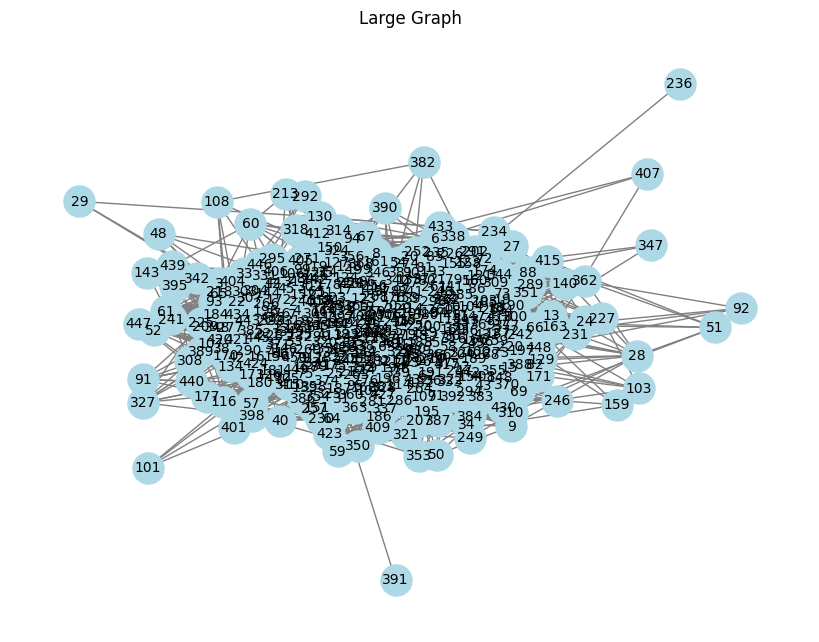

In [12]:
dataset = "../../data/le450_15b.col.txt"
graph = loading_graphs(dataset, size="Large")
num_nodes = graph.number_of_nodes()

plot_graph(graph, title="Large Graph")

In [13]:
POP_SIZE = 500
MAX_GEN = 2000
MAX_COLORS = 22
ELITISM = 10
STATIONAY_LIMIT = 500
MUTATION_RATE = 0.02

# Experiments (Name, Selection, Crossover, Mutation)
experiments = [
    {
        "Experiment": "Experiment 1",
        "Selection": tournament_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
         "Experiment": "Experiment 2",
         "Selection": tournament_selection,
         "Crossover": one_point_crossover,
         "Mutation": independent_gene_mutation,
         "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 3",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 4",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 5",
        "Selection": roulette_wheel_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 6",
        "Selection": roulette_wheel_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    }
]

In [14]:
results_table = []
best_overall = None
best_history = None

print(f"Running Experiments for {dataset}\n")

for exp in experiments:
    print(f"Running {exp["Experiment"]}...")

    best_ind, history = run_genetic_algorithm(
        graph=graph,
        pop_size=POP_SIZE,
        max_generations=MAX_GEN,
        max_colors=MAX_COLORS,
        selection_func=exp["Selection"],
        crossover_func=exp["Crossover"],
        mutation_func=exp["Mutation"],
        mutation_rate=exp["Mutation Rate"],
        elitism_count=ELITISM,
        stationary_limit=STATIONAY_LIMIT
    )

    # Store Results
    results_table.append({
        "Experiment": exp["Experiment"],
        "Selection": exp["Selection"].__name__,
        "Crossover": exp["Crossover"].__name__,
        "Mutation": exp["Mutation"].__name__,
        "Best Fitness": best_ind.fitness,
        "Conflicts": best_ind.conflicts,
        "Colors Used": len(set(best_ind.genes))
    })

    # Store Best Overall Individual
    if best_overall is None or best_ind.fitness < best_overall.fitness:
        best_overall = best_ind
        best_history = history

Running Experiments for ../../data/le450_15b.col.txt

Running Experiment 1...
Stationary state reached at generation 895.
Running Experiment 2...
Stationary state reached at generation 770.
Running Experiment 3...
Stationary state reached at generation 954.
Running Experiment 4...
Stationary state reached at generation 698.
Running Experiment 5...
Running Experiment 6...



Results Table
  Experiment                Selection           Crossover                  Mutation  Best Fitness  Conflicts  Colors Used
Experiment 1     tournament_selection one_point_crossover      single_gene_mutation          1022          1           22
Experiment 2     tournament_selection one_point_crossover independent_gene_mutation            22          0           22
Experiment 3     tournament_selection   uniform_crossover      single_gene_mutation            22          0           22
Experiment 4     tournament_selection   uniform_crossover independent_gene_mutation            22          0           22
Experiment 5 roulette_wheel_selection one_point_crossover      single_gene_mutation            22          0           22
Experiment 6 roulette_wheel_selection   uniform_crossover independent_gene_mutation         62022         62           22


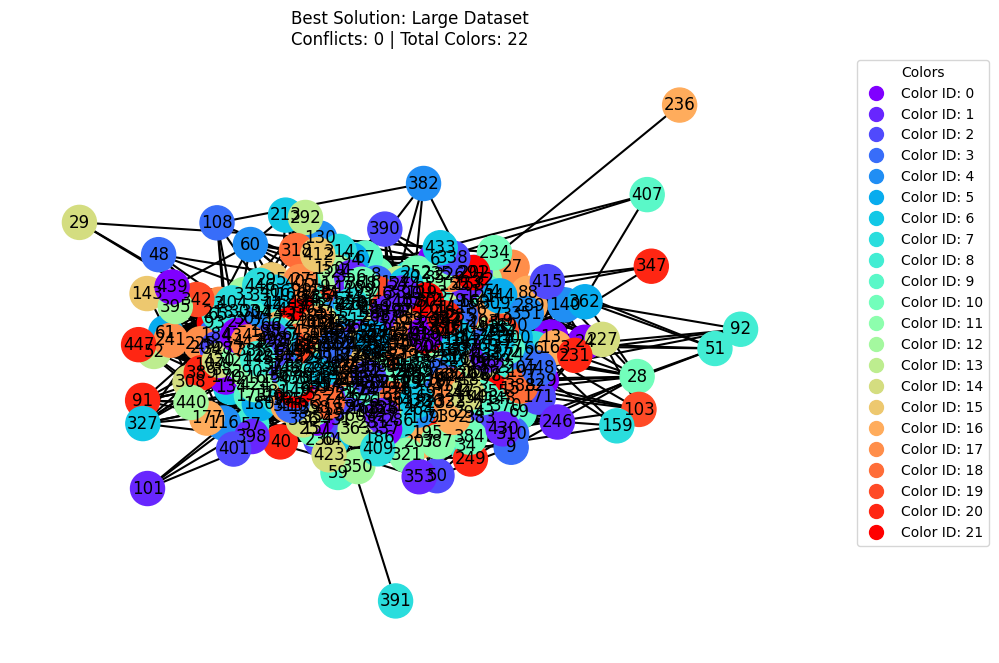

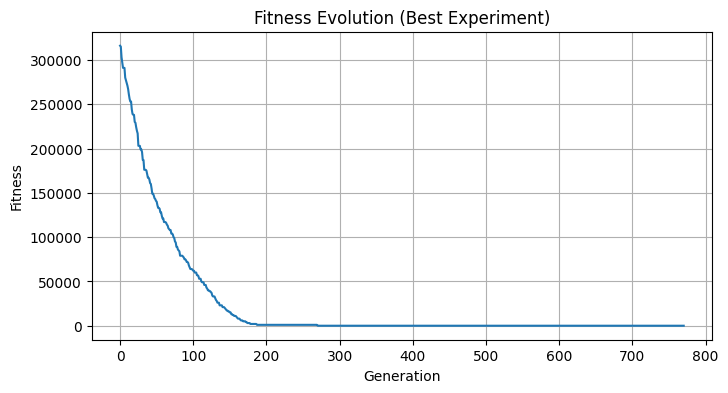

In [15]:
df = pd.DataFrame(results_table)
print("\nResults Table")
print(df.to_string(index=False))

if best_overall is not None:
    plot_colored_graph(graph, best_overall, title=f"Best Solution: Large Dataset")

    plt.figure(figsize=(8, 4))
    plt.plot(best_history)
    plt.title("Fitness Evolution (Best Experiment)")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()